Oszka Mrozowicz

Zad 1

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
#1.1
df_orders = pd.read_csv('zamowienia.csv')
df_orders = pd.read_csv('zamowienia.csv', sep=';')

df_null = df_orders.isna().sum()

In [6]:
#1.2
df_orders.loc[df_orders.sample(frac=0.1).index, 'Sprzedawca'] = 'BRAK'

In [7]:
#1.3
df_orders.loc[df_orders.sample(frac=0.05).index, 'idZamowienia'] = np.nan

In [8]:
#1.4
df_orders.loc[df_orders.sample(frac=0.2).index, 'Data zamówienia'] = np.nan


In [9]:
#1.5
df_orders.loc[df_orders.sample(frac=0.15).index, 'Utarg'] = np.nan


In [10]:
#1.6
df_with_nan = df_orders.copy()


Zad 2

In [11]:
#2.1
df_with_nan['idZamowienia'].fillna(0)

,idZamowienia
0,10248.0
1,10249.0
2,0.0
3,10251.0
4,10252.0
...,...
794,11048.0
795,11052.0
796,11053.0
797,11056.0


In [12]:
df_with_nan

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg,Data zamówienia
0,Polska,Kowalski,2003-07-16,10248.0,440.0,NaN
1,Polska,Sowiński,2003-07-10,10249.0,1863.4,NaN
2,Niemcy,BRAK,2003-07-12,NaN,1552.6,NaN
3,Niemcy,Leverling,2003-07-15,10251.0,NaN,NaN
4,Niemcy,Peacock,2003-07-11,10252.0,3597.9,NaN
...,...,...,...,...,...,...
794,Polska,King,2005-04-30,11048.0,525.0,NaN
795,Niemcy,Leverling,2005-05-01,11052.0,1332.0,NaN
796,Niemcy,Fuller,2005-04-29,11053.0,3055.0,NaN
797,Niemcy,Callahan,2005-05-01,11056.0,3740.0,NaN


In [13]:
df_with_nan.columns

Index(['Kraj', 'Sprzedawca', 'Data zamowienia', 'idZamowienia', 'Utarg',
       'Data zamówienia'],
      dtype='object')

In [14]:
#ŻLEdf_with_nan[['Kraj', 'Sprzedawca', 'Data zamowienia', 'idZamowienia', 'Utarg']] = df_with_nan['Kraj;Sprzedawca;Data zamowienia;idZamowienia;Utarg'].str.split(';', expand=True)

In [15]:
df_with_nan['Data zamowienia'].dtype


dtype('O')

In [16]:
#2.2
df_with_nan['Data zamowienia'].fillna(method='ffill', inplace = True)

<ipython-input-16-a04c26bd2f28>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_nan['Data zamowienia'].fillna(method='ffill', inplace = True)
<ipython-input-16-a04c26bd2f28>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_with_nan['Data zamowienia'].fillna(method='ffill', inplace = True)


In [17]:
2.3
#2.3
df_with_nan['Utarg'] = pd.to_numeric(df_with_nan['Utarg'], errors='coerce')
df_with_nan['Utarg'] = df_with_nan.groupby('Kraj')['Utarg'].transform(lambda x: x.fillna(x.mean()))

display(df_with_nan['Utarg'])


,Utarg
0,440.000000
1,1863.400000
2,1552.600000
3,1579.327988
4,3597.900000
...,...
794,525.000000
795,1332.000000
796,3055.000000
797,3740.000000


Zad 3

Wyświetl na wykresach typu histogram wraz z funkcją rozkładu (dokładnie tak jak w przykładach powyżej) rozkłady cechy Utarg dla zbioru oryginalnego oraz tego po wykonaniu poleceń z zadania 2.



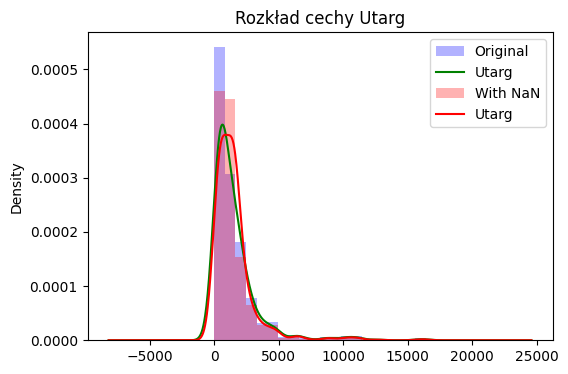

In [18]:
def compare_histograms(df_orders, df_with_nan, bins=20):
    feature = 'Utarg'

    df_orders[feature].hist(bins=bins, figsize=(6, 4), alpha=0.3, density=True, color='blue', label='Original')
    if df_orders[feature].dropna().shape[0] > 1:
        df_orders[feature].plot.density(color='g')

    df_with_nan[feature].hist(bins=bins, alpha=0.3, density=True, color='red', label='With NaN')
    if df_with_nan[feature].dropna().shape[0] > 1:
        df_with_nan[feature].plot.density(color='r')

    plt.title(f'Rozkład cechy {feature}')
    plt.legend()
    plt.show()
    plt.close()

compare_histograms(df_orders, df_with_nan)


Zad 4

4.1 Średnią wartość zamówienia dla każdego kraju.
4.2 Średnią wartość zamówienia dla każdego roku, a następnie miesiąca (grupowanie dwustopniowe).\
4.3 Liczbę zamówień, którą złożył każdy sprzedawca w danym roku.
4.4 Nazwę sprzedawcy z każdego kraju, którego sumaryczny utarg był najwyższy.
4.5 Sumę utargu w każdym kwartale (uwzględnij również rok), i posortuj od wartości najwyższych.

In [25]:
#4.1
sr_utarg_kraj = df_with_nan.groupby('Kraj')['Utarg'].mean().round(2)
sr_utarg_kraj


,Utarg
Kraj,
Niemcy,1579.33
Polska,1422.77


In [28]:
#4.2
df_with_nan['Data zamowienia'] = pd.to_datetime(df_with_nan['Data zamowienia'], errors='coerce')

df_with_nan['Rok'] = df_with_nan['Data zamowienia'].dt.year
df_with_nan['Miesiac'] = df_with_nan['Data zamowienia'].dt.month
sr_utarg_rok = df_with_nan.groupby(['Rok','Miesiac'])['Utarg'].mean()
sr_utarg_rok

Rok   Miesiac
2003  7          1532.734702
      8          1121.209825
      9          1024.390360
      10         1469.813439
      11         1966.557799
      12         1301.619674
2004  1          1981.180586
      2          1429.246886
      3          1480.884611
      4          1131.740586
      5          2010.210639
      6          1716.925465
      7          1260.500580
      8          1401.330032
      9          1285.939252
      10         1943.982155
      11         1026.100344
      12         1613.347395
2005  1          1503.857443
      2          1940.991607
      3          1191.636548
      4          1971.027944
      5          1155.370000
Name: Utarg, dtype: float64

In [29]:
#4.3
l_zamowien_rok = df_with_nan.groupby(['Sprzedawca', 'Rok'])['idZamowienia'].count()
l_zamowien_rok

Sprzedawca  Rok 
BRAK        2003    12
            2004    40
            2005    25
Callahan    2003    16
            2004    49
            2005    22
Davolio     2003    18
            2004    50
            2005    33
Dudek       2003     5
            2004    15
            2005    13
Fuller      2003    13
            2004    39
            2005    34
King        2003    10
            2004    28
            2005    20
Kowalski    2003     9
            2004    16
            2005    12
Leverling   2003    14
            2004    56
            2005    34
Peacock     2003    26
            2004    61
            2005    34
Sowiński    2003    11
            2004    26
            2005    18
Name: idZamowienia, dtype: int64

In [30]:
#4.4
suma_utarg = df_with_nan.groupby(['Kraj','Sprzedawca'])['Utarg'].sum()
najwyzszy_utarg = suma_utarg.groupby('Kraj').idxmax()
najwyzszy_utarg


,Utarg
Kraj,
Niemcy,"(Niemcy, Leverling)"
Polska,"(Polska, King)"


In [33]:
#4.5
df_with_nan['Kwartal'] = df_with_nan['Data zamowienia'].dt.to_period('Q')

suma_utarg_kwartal = df_with_nan.groupby(['Kwartal'])['Utarg'].sum().sort_values(ascending = False)
print("Suma utargu w kwartałach (malejąco):\n", suma_utarg_kwartal)

Suma utargu w kwartałach (malejąco):
 Kwartal
2005Q1    268869.212303
2004Q4    166616.823568
2004Q1    153338.113420
2005Q2    152788.287866
2004Q2    149786.721977
2004Q3    138389.090747
2003Q4    125077.388735
2003Q3     73356.513481
Freq: Q-DEC, Name: Utarg, dtype: float64
